### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Import Dataset 

In [2]:
df = pd.read_csv("Dataset of Diabetes .csv")

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
df.shape

(1000, 14)

In [5]:
# Print the column names
print(df.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [6]:
print(df.dtypes)

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### Initial data exploration led to us dropping two values - ID and No_Pation as unique values, not useful for ML


In [9]:
to_drop = ['ID',
           'No_Pation']

df.drop(to_drop, inplace=True, axis=1)

In [10]:
# Print the column names
print(df.columns)

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')


### Visualise the Dataset 

In [11]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


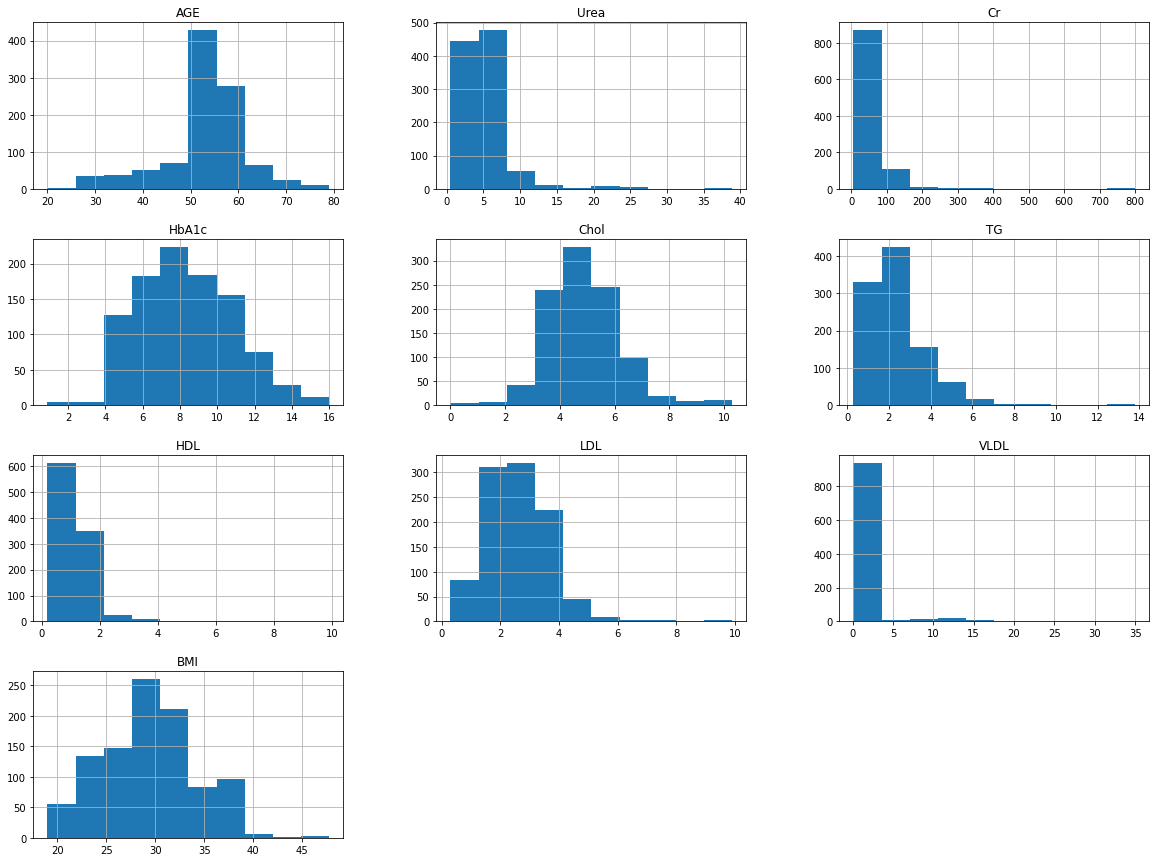

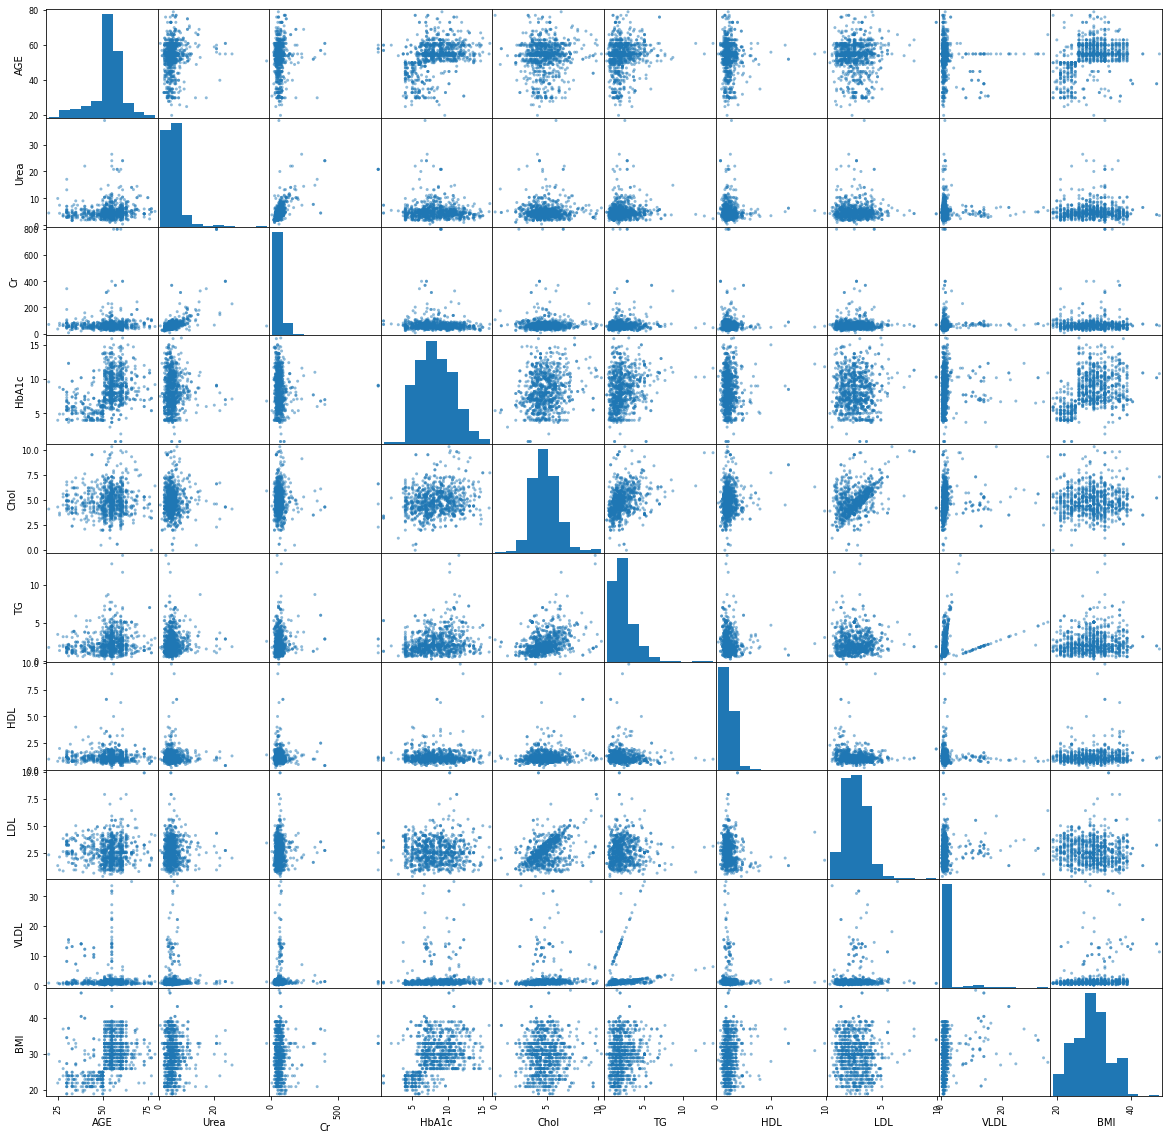

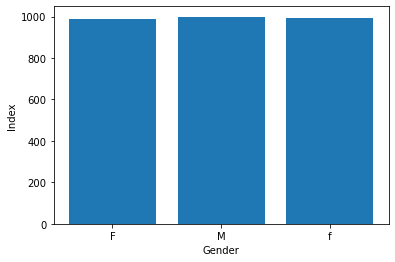

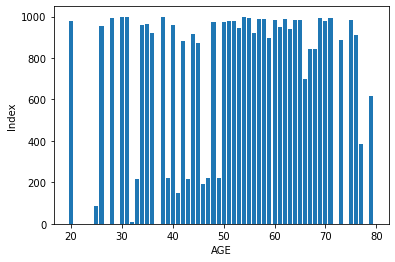

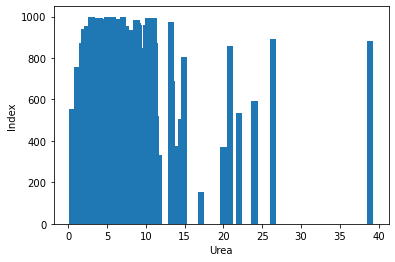

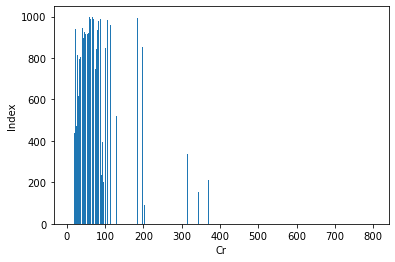

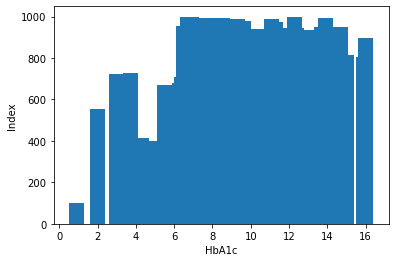

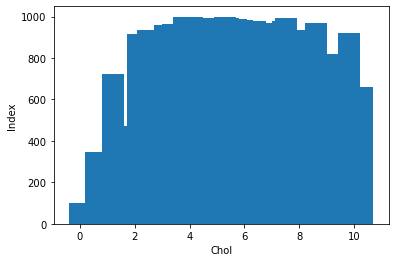

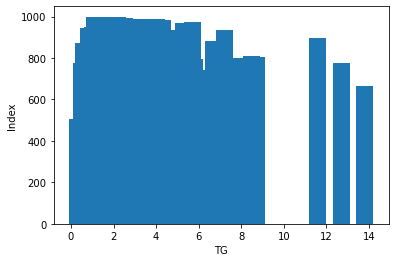

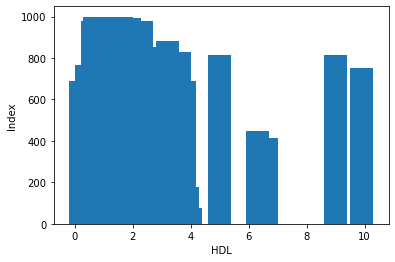

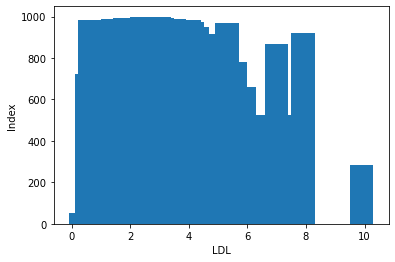

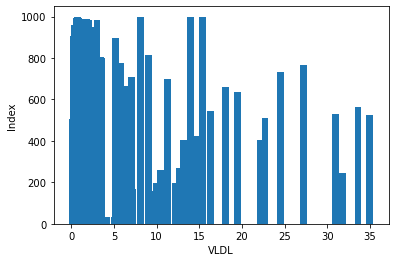

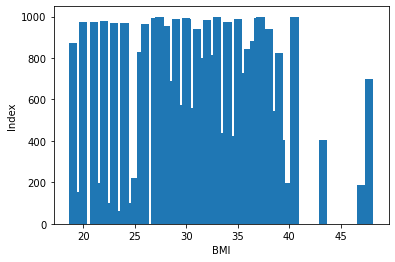

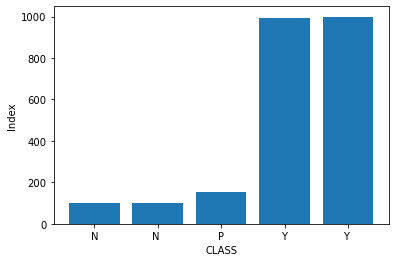

In [12]:
# Plot histogram for each column but only interested in continuous variables
df.hist(bins=10, figsize=(20,15))
plt.show()

# Plot scatter matrix for each column
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20, 20))
plt.show()

# Plot a bar chart for each column but only interested in categorical variables
for column in df.columns:
    plt.bar(df[column], df.index)
    plt.xlabel(column)
    plt.ylabel('Index')
    plt.show()


# Defining the problem statement:

Can we create a predictive model which can tell if a person will develop diabetes based on potential risk factors such as obesity, high cholesterol and high triglycerides

Target Variable: Class
Predictors: age, gender, BMI, Chol, TG etc.

CLASS = N No diabetes
CLASS = P Pre diabetes 
CLASS = D Diabetes

Need to look at distribution of target variable


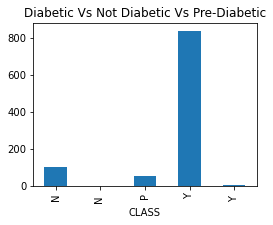

In [13]:
# Creating Bar chart as the Target variable is Categorical
GroupedData = df.groupby('CLASS').size()
GroupedData.plot(kind='bar', figsize=(4,3), title='Diabetic Vs Not Diabetic Vs Pre-Diabetic');

## The Data is skewed
The features need to be scled so that they have similar ranges. This can be done using techniques such as Min-Max scaling or Standard scaling. Min-Max scaling scales the data to a fixed range, typically between 0 and 1, while Standard scaling scales the data to have a mean of 0 and a standard deviation of 1.
Need to make all values numbers first.

In [14]:
df_train, df_test = train_test_split(df,test_size=0.2)

In [15]:
# create a OneHotEncoder object with sparse=False
ohe = OneHotEncoder(sparse_output=False)

# fit and transform the 'Gender' column
gender_encoded = ohe.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# fit and transform the 'CLASS' column
class_encoded = ohe.fit_transform(df[['CLASS']])
class_encoded_df = pd.DataFrame(class_encoded, columns=ohe.get_feature_names_out(['CLASS']))

# combine the original dataset with the encoded columns
encoded_df = pd.concat([df, gender_encoded_df, class_encoded_df], axis=1)

In [16]:
df_train.head

<bound method NDFrame.head of     Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
890      M   60   6.9  79    8.0   2.5  1.9  1.3  3.1   0.8  30.0     Y
169      M   45   3.6  80    5.0   6.1  3.7  0.7  3.9   1.7  22.0     Y
795      M   60   4.9  33   10.2   3.9  0.6  1.3  2.3   0.3  29.0     Y
680      M   54   7.4  84   10.7   4.1  2.2  0.9  2.2   1.0  29.0     Y
615      F   60   3.2  31   11.9   6.1  2.6  0.9  4.1   1.1  39.0     Y
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...   ...
703      M   58   2.0  72   10.9   4.8  1.6  1.0  3.1   0.7  33.0     Y
64       F   35   3.9  38    5.4   3.8  5.9  0.5  4.3   1.0  22.0     N
884      M   51  38.9  58    6.8   5.9  2.6  1.4  3.4   1.2  33.0     Y
885      F   60   4.8  44    8.0   3.5  1.8  1.4  1.4   0.8  27.0     Y
473      F   54   6.0  61    8.0   5.2  3.4  3.2  1.5   1.5  33.0     Y

[800 rows x 12 columns]>

In [17]:
scaler = StandardScaler()

In [18]:
# Encode the categorical variables using dummy encoding
df_encoded = pd.get_dummies(df, columns=['Gender','CLASS'])

# Print the encoded dataframe
print(df_encoded)

inplace=True

     AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_F  \
0     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1   
1     26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0         0   
2     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1   
3     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1   
4     33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0         0   
..   ...   ...  ..    ...   ...  ...  ...  ...   ...   ...       ...   
995   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0         0   
996   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2         0   
997   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4         0   
998   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5         0   
999   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0         0   

     Gender_M  Gender_f  CLASS_N  CLASS_N   CLASS_P  CLASS_Y  CLASS_Y   
0           0         0        1         0        0        0  

In [19]:
# Check if there are any 'F' values in the 'Gender' column
if 'F' in df['Gender'].values:
    print('There are values of F in the Gender column')
else:
    print('There are no values of F in the Gender column')

There are values of F in the Gender column


In [20]:
# One-hot encode the 'Gender' column
df = pd.get_dummies(df, columns=['Gender'])

# Check if 'F' exists in any of the encoded columns
print('F' in df.columns)

False


In [21]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

ValueError: could not convert string to float: 'N'

In [ ]:
scaler.fit(X)

 ###   The transformed feature data should now have zero mean and unit variance, which can be used as input for machine learning models. Scaler should only be fit on the training data and then applied to the test data using the same scaler object. This ensures that the same scaling is applied to both the training and test data, preventing any data leakage from the test set.

In [ ]:
df.head()  

In [22]:
import missingno as msno

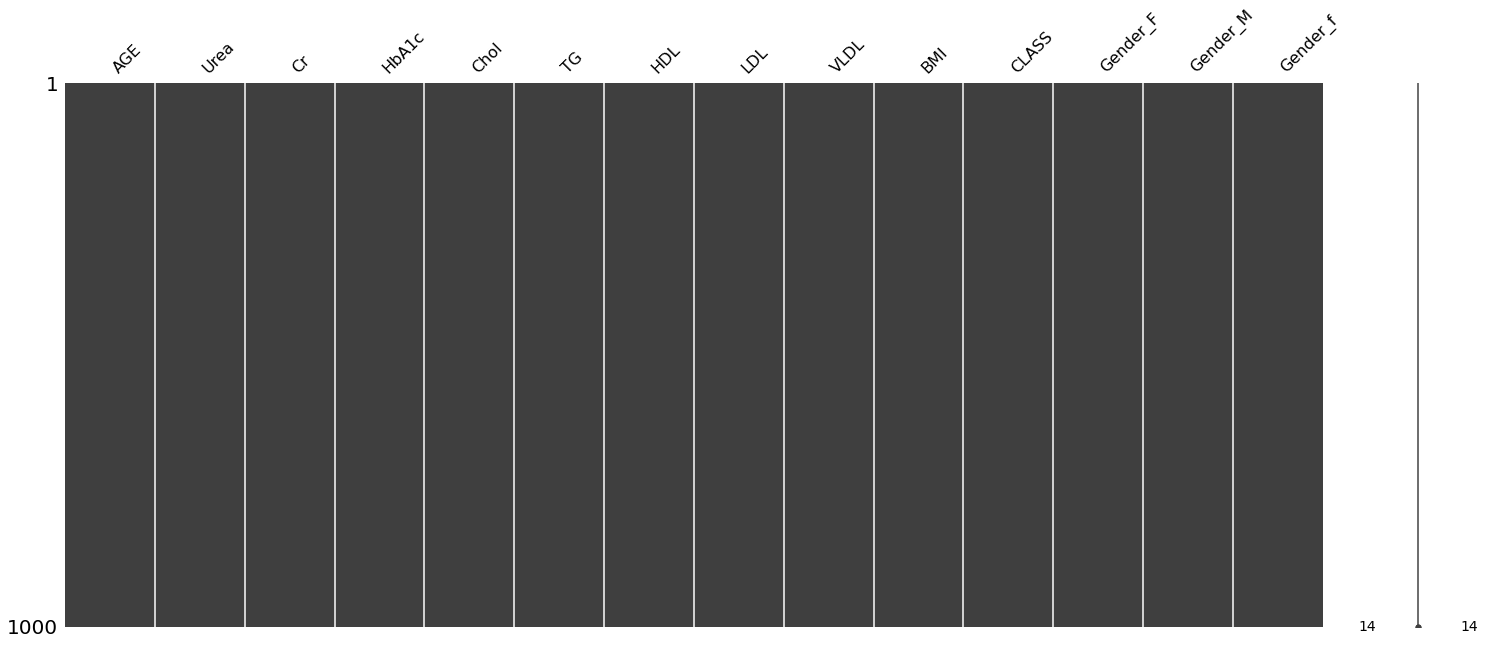

In [23]:
## double checking for missing data
ax=msno.matrix(df)

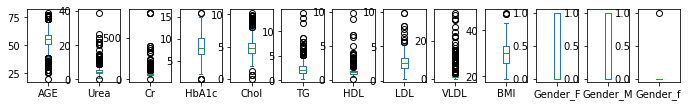

In [24]:
# Plot a boxplot for each column
df.plot(kind='box', subplots=True, layout=(22,55), figsize=(50,35))
plt.show()

In [25]:
#### description of columns
df.Urea.describe()

count    1000.000000
mean        5.124743
std         2.935165
min         0.500000
25%         3.700000
50%         4.600000
75%         5.700000
max        38.900000
Name: Urea, dtype: float64

In [26]:
df.AGE.describe()

count    1000.000000
mean       53.528000
std         8.799241
min        20.000000
25%        51.000000
50%        55.000000
75%        59.000000
max        79.000000
Name: AGE, dtype: float64

In [27]:
df.Cr.describe()

count    1000.000000
mean       68.943000
std        59.984747
min         6.000000
25%        48.000000
50%        60.000000
75%        73.000000
max       800.000000
Name: Cr, dtype: float64

In [28]:
df.HbA1c.describe()

count    1000.000000
mean        8.281160
std         2.534003
min         0.900000
25%         6.500000
50%         8.000000
75%        10.200000
max        16.000000
Name: HbA1c, dtype: float64

In [29]:
df.Chol.describe()

count    1000.000000
mean        4.862820
std         1.301738
min         0.000000
25%         4.000000
50%         4.800000
75%         5.600000
max        10.300000
Name: Chol, dtype: float64

In [30]:
df.TG.describe()

count    1000.000000
mean        2.349610
std         1.401176
min         0.300000
25%         1.500000
50%         2.000000
75%         2.900000
max        13.800000
Name: TG, dtype: float64

In [31]:
df.HDL.describe()

count    1000.000000
mean        1.204750
std         0.660414
min         0.200000
25%         0.900000
50%         1.100000
75%         1.300000
max         9.900000
Name: HDL, dtype: float64

In [32]:
df.VLDL.describe()

count    1000.000000
mean        1.854700
std         3.663599
min         0.100000
25%         0.700000
50%         0.900000
75%         1.500000
max        35.000000
Name: VLDL, dtype: float64

In [33]:
df.BMI.describe()

count    1000.000000
mean       29.578020
std         4.962388
min        19.000000
25%        26.000000
50%        30.000000
75%        33.000000
max        47.750000
Name: BMI, dtype: float64

### Use One Hot Encoder on "Gender" column

In [34]:
from scipy import stats

data = pd.read_csv('Dataset of Diabetes .csv')
num_cols = data.select_dtypes(include='number').columns
z_scores = stats.zscore(data[num_cols])

In [35]:
# Replace the values in the 'class' column
df['CLASS'] = data['CLASS'].replace({'CLASS_1': 1, 'CLASS_0': 0})

# Verify the data types of the 'class' column
print(df['CLASS'].dtype)

object


In [36]:
# Create dummy variables for the "class" column
dummy_df = pd.get_dummies(df['CLASS'], prefix='CLASS')

# Merge the original dataframe and the dummy variables dataframe
df = pd.concat([df, dummy_df], axis=1)

# Drop the original "class" column
df.drop('CLASS', axis=1, inplace=True)

# Print the updated dataframe
print(df.head())

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_F  Gender_M  \
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1         0   
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0         0         1   
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1         0   
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0         1         0   
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0         0         1   

   Gender_f  CLASS_N  CLASS_N   CLASS_P  CLASS_Y  CLASS_Y   
0         0        1         0        0        0         0  
1         0        1         0        0        0         0  
2         0        1         0        0        0         0  
3         0        1         0        0        0         0  
4         0        1         0        0        0         0  


In [37]:
df.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M,Gender_f,CLASS_N,CLASS_N,CLASS_P,CLASS_Y,CLASS_Y
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,1,0,0,0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,1,0,1,0,0,0,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,1,0,0,0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,1,0,0,0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,0,1,0,0,0,0


In [55]:
# Check for missing or null values
print(data.isnull().sum())

# Replace missing values with mean value of the column
data = data.fillna(data.mean())


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


/var/folders/sf/rg423gc11bs8__byfq0zw8140000gp/T/ipykernel_80038/2904771191.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       1000 non-null   int64  
 1   Urea      1000 non-null   float64
 2   Cr        1000 non-null   int64  
 3   HbA1c     1000 non-null   float64
 4   Chol      1000 non-null   float64
 5   TG        1000 non-null   float64
 6   HDL       1000 non-null   float64
 7   LDL       1000 non-null   float64
 8   VLDL      1000 non-null   float64
 9   BMI       1000 non-null   float64
 10  CLASS_N   1000 non-null   uint8  
 11  CLASS_N   1000 non-null   uint8  
 12  CLASS_P   1000 non-null   uint8  
 13  CLASS_Y   1000 non-null   uint8  
 14  CLASS_Y   1000 non-null   uint8  
dtypes: float64(8), int64(2), uint8(5)
memory usage: 83.1 KB


In [64]:
# drop the columns 'Gender_M', 'Gender_f', and 'Gender_F'
df.drop(['Gender_M', 'Gender_f', 'Gender_F'], axis=1, inplace=True)


print(df)

KeyError: "['Gender_M' 'Gender_f' 'Gender_F'] not found in axis"

### Random forest MLM

In [61]:
# Split the dataset into input features and output labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rfc.fit(X_train, y_train)

# Predict the output values on the test data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9966666666666667


### Decision Tree MLM

In [67]:
df.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS_N,CLASS_N,CLASS_P,CLASS_Y,CLASS_Y
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0,0,0,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0,0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1,0,0,0,0


In [71]:
# Split the data into input features and target variable
X = data.drop('CLASS_', axis=1)
y = data['CLASS_']

# Encode the target variable using label encoder
le = LabelEncoder()
y = le.fit_transform(y)

# Encode the categorical variable 'Y' as one-hot vectors
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Train the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predict the output values on the test data
y_pred = dtc.predict(X_test)

# Evaluate the performance of the classifier
score = dtc.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score*100))

KeyError: "['CLASS_'] not found in axis"

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predict target values for test data
y_pred = dtc.predict(X_test)

# Calculate accuracy of the model
accuracy = dtc.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

ValueError: could not convert string to float: 'F'